# Clase 7: Estabilidad

## Introducción

En control clásico trabajamos con los modelos de entrada-salida en sistemas lineales, y hasta ahora de ellos conocemos la llamada estabilidad externa o estabilidad entrada-salida. 

En ese contexto decimos que un sistema es estable si ante cualquier excitación de entrada acotada que apliquemos se generará una respuesta de la salida que deberá ser acotada.

¿Por qué nos importa garantizar la estabilidad en este sentido? Se nos ocurren dos situaciones en las que hay que ser cuidadosos:

En sistemas bajo análisis, es importante conocer su estabilidad porque nos permite establecer una estrategia de control acorde y también un modelo adecuado.

Vayamos a un ejemplo simple y concreto:

Aleksandr Lyapunov, o como le dicen los amigos, Ale, se compró un Porsche y quiso salir a pasear para estrenarlo. Su objetivo era viajar desde su casa y visitar a su viejo amigo J.P. LaSalle, Joe. Ale, como buen físico, decidió hacer un modelo de su problema y con la simplicidad en mente propuso que su auto era equivalente a una masa puntual:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1rJqliqs2jmsOLJSygGZWr0c87nsoPEGL'/>
<figcaption>Modelo de auto</figcaption></center>
</figure>

El modelo responde a la Ley de Newton $F = M a$. Le interesaba la posición del auto, $y = x$ variable de interés y como acción de control o entrada la fuerza ejercida del motor sobre la masa $u = f$.

Con estas consideraciones llega al modelo:

$$ \ddot{y} = \frac{u}{M} $$

Con transferencia:

$$ \frac{Y(s)}{U(s)} = \frac{1/M}{s^2} $$

Y una de las primeras preguntas que se hace es si el sistema es estable. ¿Qué sucede con la respuesta a un escalón de fuerza de amplitud 1 N?

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:294: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


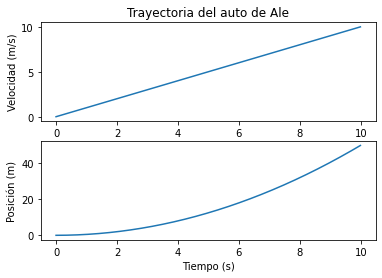

In [3]:
!pip install control
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

M = 1
t_ini = 0
t_fin = 10
t_paso = 0.01
t = np.arange(t_ini, t_fin, t_paso)
u = 1.0*np.ones(len(t))

auto = ctrl.tf([1/M], [1, 0, 0])
[t, y, estado] = ctrl.forced_response(auto, T=t, U=u, return_x=True)
plt.subplot(212)
plt.plot(t, y)
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
velocidad = estado[0]
plt.subplot(211)
plt.ylabel('Velocidad (m/s)')
plt.plot(t, velocidad)
plt.title('Trayectoria del auto de Ale')
plt.show()

Notamos que la velocidad crece linealmente y la posición cuadráticamente. La primera reacción de Ale fue de felicidad y despreocupación, pero lentamente empezó a sospechar.

¿Qué puede salir mal? ¿Por qué llamaría inestable a este sistema? Se le ocurrieron 3 situaciones:

1. Que la velocidad se vuelva muy cercana a c = 300000 km/s y el modelo físico no valga más. 
2. Que el Porsche no soporte más de 400 km/h y se rompa. 

<figure>
<center>
<img src='https://drive.google.com/uc?id=1LnkX3f-e2lMAc0BB4luZ2vcEAkznsUF_'/>
<figcaption>Velocidad máxima del auto</figcaption></center>
</figure>

3. Que el auto llegue a un barranco y como no puede convertirse en avión, caiga y explote.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1_NwZrEBzuxKvzodTVlDX-0xPTC40wJ69'/>
<figcaption>El auto llega a un barranco</figcaption></center>
</figure>

Lo que queremos mostrar con este ejemplo es que un sistema inestable a lazo abierto puede traernos varios dolores de cabeza.

Asimismo, el segundo punto importante de la estabilidad es en el contexto del control aplicado a un sistema. Necesitamos garantizar la estabilidad del sistema junto a su controlador. Es decir, el controlador no debe desestabilizar al sistema sino que parte de su trabajo es mantenerlo dentro de las condiciones de trabajo esperadas o deseadas.

**En resumen:**

Decimos que un sistema es BIBO estable, si para toda entrada acotada (bounded input) se obtiene una respuesta de salida acotada (bounded output).

Esta condición se da para sistemas lineales e invariantes en el tiempo si y solo si la respuesta al impulso $g(t)$ del sistema es absolutamente integrable: 

$$ \int_0^\infty |g(t)|dt \leq M < \infty$$

O absolutamente sumable en sistemas de tiempo discreto:

$$ \sum_{k=0}^\infty |g(k)| \leq M < \infty $$

Equivalentemente, se puede llegar a la conclusión que todos los $p_i$, polos de la función transferencia $H(s) = Y(s)/U(s)$, deber cumplir:

$$ \text{Re}(p_i) < 0 $$ para sistemas LTI de tiempo continuo. O 

$$ |p_i| < 1 $$ para sistemas LTI de tiempo discreto.

El modelo de auto de Ale, tiene dos polos en el origen $p_1 = p_2 = 0$ y por lo tanto, no es BIBO estable.

**Para pensar:** ¿Como crees que estas condiciones se extienden al caso MIMO?

**¿Es la única definición de estabilidad que existe?**

No, no lo es. Con la introducción de los modelos en variables de estado, que contienen una descripción de la dinámica interna de un sistema, surge la necesidad de evaluar la estabilidad no solo desde el punto de vista de la o las entradas de excitación del sistema, sino también de la respuesta no forzada, libre o también conocida como la respuesta a las condiciones iniciales.

## Estabilidad interna o de Lyapunov

En la clase teórica vimos que Lyapunov definió su idea de estabilidad alrededor de los puntos de equilibrio de un sistema. ¿Qué son estos puntos de equilibrio?

Para un sistema:

$$ \dot{x} = f(x,u) $$

son todos aquellos puntos del espacio de estados que cumplen, que dada $u = 0$,

$$ \dot{x} = f(x_e, 0) = 0.$$

Y bajo esa condición, si  $x(0) = x_e $ hace que $x(t) = x_e$ para todo $t \geq 0$.

Luego Lyapunov dijo:

Un punto de equilibrio $x_e$ del sistema $ \dot{x} = f(x,0) $ es estable si para cualquier $\epsilon > 0$ existe un valor $\delta(t_0, \epsilon)$ tal que si $||x(t_0)-x_e||< \delta$ entonces $||x(t)-x_e|| < \epsilon$  para todo $t > t_0$. Si el $\delta$ no depende del instante inicial $t_0$, el sistema es uniformemente estable.

### Ejemplo: Péndulo rígido

Estudiemos el ejemplo más famoso de todos. Es un péndulo sujeto de un punto fijo y que puede girar 360 grados alrededor de ese punto. Vamos a considerar un parámetro $\gamma$ asociado al rozamiento en el punto de fijación.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1fc5WBYJpCSa_IIhte9SozgxSRxSc80_i'/>
<figcaption>Péndulo simple</figcaption></center>
</figure>


Las ecuaciones de este sistema son:

$$ \dot{x} = \begin{bmatrix} x_2 \\ -\frac{3 g}{2 l} \sin(x_1) - \frac{3 \gamma}{m l^2} x_2 + \frac{3}{m l^2} u \end{bmatrix} $$

Donde:

* $x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} \theta \\ \dot{\theta} \end{bmatrix}$
* $g \simeq $ 10 m/s^2  es la aceleración de la gravedad
* $l$ es el largo del péndulo
* $m$ es la masa del péndulo
* $u$ es un torque de entrada de perturbación

**Ejercicio:** Hallar los puntos de equilibrio de este sistema.

Deberías llegar a que los puntos de equilibrio son:

$$x_{ek} = \begin{bmatrix} k \pi \\ 0 \end{bmatrix}  $$

con $k \in \mathbb{Z}$.

**Para pensar:** ¿Qué interpretación le das al $x_{e0} = [0\, 0]^T$ y $x_{e1} = [\pi\, 0]^T$? ¿Y para los otros valores de k?

Simulemos lo que pasa cuando el péndulo arranca en la condición inicial $x_{e0} = [0\, 0]^T$:

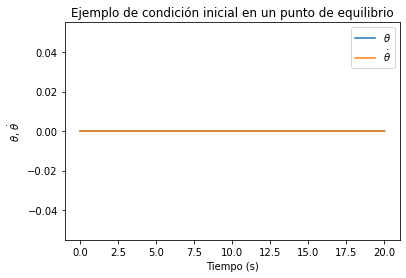

In [4]:
import control as ctrl
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy import pi

l = 0.5 # m
m = 0.24 # kg
g = 10 # m/s^2
gamma = 0.01 # Nms

tiempo_inicial = 0
tiempo_final = 20
time_span = (tiempo_inicial, tiempo_final)
paso_tiempo = 0.001
tiempo = np.arange(tiempo_inicial, tiempo_final, paso_tiempo)

def u_function(t):
    u = 0
    return u

def f_pendulo(t, x, l=l, m=m, g=g, gamma=gamma):
    u = u_function(t)
    x1 = x[0] # x1: theta(t)
    x2 = x[1] # x2: dtheta_dt(t)
    dx1_dt = x2
    dx2_dt = -3*g/(2*l)*np.sin(x1) - 3*gamma/(m*l**2)*x2 + 3/(m*l**2)*u
    return [dx1_dt, dx2_dt]

x0 = [0, 0]

respuesta_pendulo = sp.integrate.solve_ivp(f_pendulo, time_span, x0, t_eval=tiempo)

plt.plot(tiempo, respuesta_pendulo.y[0], label=r'$\theta$')
plt.plot(tiempo, respuesta_pendulo.y[1], label=r'$\dot{\theta}$')
plt.title('Ejemplo de condición inicial en un punto de equilibrio')
plt.legend()
plt.ylabel(r'$\theta$, $\dot{\theta}$')
plt.xlabel('Tiempo (s)')
plt.show()

Notamos que el sistema se queda en el punto de equilibrio. O por lo menos pasan 20 segundos y el sistema no evoluciona alejandose de él. Este es el resultado esperado. 

Esta respuesta tiene sentido físico porque el punto $\theta = 0$ rad y $\dot{\theta} = 0$ rad/s del espacio de estados corresponde al péndulo colgando en la posición inferior y sin ninguna velocidad angular. Tiene sentido que se quede quieto.

¿Qué pasará ahora si lo corremos un poco de ese punto de equilibrio? Probemos correrlo 45 grados en $\theta$.

Sería que arranque en $x_{0} = [\frac{\pi}{4}\,  0]^T$:

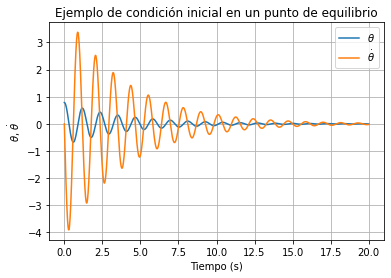

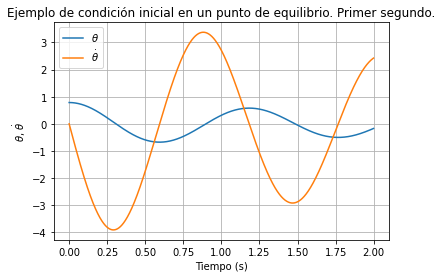

In [5]:
x0 = [pi/4, 0]

respuesta_pendulo = sp.integrate.solve_ivp(f_pendulo, time_span, x0, t_eval=tiempo)

plt.plot(tiempo, respuesta_pendulo.y[0], label=r'$\theta$')
plt.plot(tiempo, respuesta_pendulo.y[1], label=r'$\dot{\theta}$')
plt.title('Ejemplo de condición inicial en un punto de equilibrio')
plt.legend()
plt.grid()
plt.ylabel(r'$\theta$, $\dot{\theta}$')
plt.xlabel('Tiempo (s)')
plt.show()

idx_primeros_segundos = np.searchsorted(tiempo, 2)
plt.plot(tiempo[0:idx_primeros_segundos], respuesta_pendulo.y[0][0:idx_primeros_segundos], label=r'$\theta$')
plt.plot(tiempo[0:idx_primeros_segundos], respuesta_pendulo.y[1][0:idx_primeros_segundos], label=r'$\dot{\theta}$')
plt.title('Ejemplo de condición inicial en un punto de equilibrio. Primer segundo.')
plt.legend()
plt.grid()
plt.ylabel(r'$\theta$, $\dot{\theta}$')
plt.xlabel('Tiempo (s)')
plt.show()

En este caso vemos que al tener un desplazamiento inicial de 45 grados, o $\pi/4$, al iniciar la simulación evoluciona con ángulo decreciente, hacia el punto de equilibrio $x_{e0}$ antes simulado. En azul vemos cómo oscila en ángulo alrededor del 0, decreciendo la amplitud de la oscilación.

La velocidad angular oscila, porque el péndulo alcanza velocidad máxima en valor absoluto al cruzar el punto de equilibrio, y velocidad angular nula al llegar al ángulo máximo de cada oscilación. Notar en el detalle de los primeros segundo cómo la amplitud máxima de oscilación va cayendo en cada oscilación (trazo azul). Lo mismo sucede para la velocidad angular máxima en cada cruce sucesivo del origen (trazo naranja).

Hasta acá no hay ninguna sorpresa. Como propusimos en el modelo, el sistema tiene un rozamiento y sabemos que eso hace que pierda energía y eventualmente el péndulo deje de oscilar y termine en el punto de equilibrio.

Nos queda poner al péndulo en el otro punto de equilibrio: $x_{e2} = [\pi\, 0]^T$:

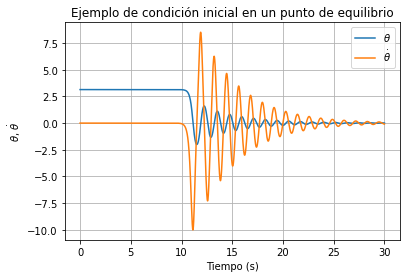

In [6]:
x0 = [pi, 0]

tiempo_final = 30
time_span = (tiempo_inicial, tiempo_final)
tiempo = np.arange(tiempo_inicial, tiempo_final, paso_tiempo)

respuesta_pendulo = sp.integrate.solve_ivp(f_pendulo, time_span, x0, t_eval=tiempo, method='RK45', atol=1e-6, rtol=1e-6)

plt.plot(tiempo, respuesta_pendulo.y[0], label=r'$\theta$')
plt.plot(tiempo, respuesta_pendulo.y[1], label=r'$\dot{\theta}$')
plt.title('Ejemplo de condición inicial en un punto de equilibrio')
plt.legend()
plt.grid()
plt.ylabel(r'$\theta$, $\dot{\theta}$')
plt.xlabel('Tiempo (s)')
plt.show()

¡Sorpresa! A pesar de arrancar lo más bien en el punto de equilibrio $x_{e1}$, vemos que pasado un tiempo el péndulo empieza a oscilar y termina evolucionando hacia $x_{e0}$.

**Para pensar:** ¿Por qué te parece que sucede esto?

En síntesis, Lyapunov dice que un sistema es estable alrededor de un punto de equilibrio si puedo ubicar la condición inicial lo suficientemente cerca de él y garantizar que no se aleje en una cierta distancia del mismo. Esa distancia puede ser cualquiera que se nos ocurra.

Si bien no lo demostramos, sino que lo mostramos, y con la intuición de la física del problema podemos decir que:

* $x_{e0} = [0\, 0]^T$ es un punto de equilibrio estable y
* $x_{e1} = [\pi\, 0]^T$ es un punto de equilibrio inestable

ambos, según el criterio de estabilidad de Lyapunov.

**Ejercicio:** Para demostrar la estabilidad Lyapunov propone un método llamado directo y que vimos en la clase teórica en donde se busca una función relacionada a la energía del sistema. ¿Podés demostrarlo para este caso?. Queda como desafío para ver si te animás.

Repitamos ahora varias simulaciones, para diversas condiciones iniciales, pero en un diagrama de fase:

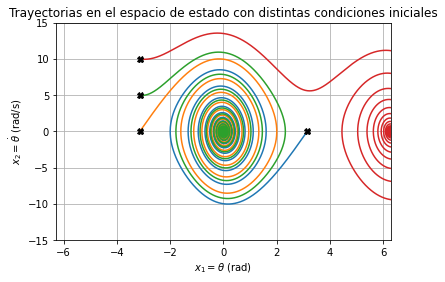

In [7]:
# Diagrama de fase de python-control. Requiere invertir el argumento de la función t «-» x
def ode_f_pendulo(x, t):
    return f_pendulo(t, x)

X0 = np.array([
     [pi,0],
     [-pi,0],
     [-pi,5],
     [-pi,10],
     ])

plt.figure() 
plt.axis([-2*pi, 2*pi, -15, 15]) 
plt.title('Trayectorias en el espacio de estado con distintas condiciones iniciales')
plt.ylabel(r'$x_2 = \dot{\theta}$ (rad/s)')
plt.xlabel(r'$x_1 = \theta$ (rad)')
ctrl.phase_plot(ode_f_pendulo, X0=X0, T=tiempo)
plt.plot(X0[:,0], X0[:,1], 'Xk')
plt.grid()
plt.show()

**Ejercicio:** Explicá qué es lo que está pasando en cada uno de los cuatro casos. Los puntos negros marcan cada una de las condiciones iniciales probadas.

**Para pensar:** Vimos que el origen $x_{e0} = [0\, 0]^T$ es un punto de equilibrio estable, ¿lo es localmente o globalmente y por qué? ¿Es asintóticamente estable?

## Estabilidad interna en sistemas LTI

¿Cómo se aplica el criterio de estabilidad interna o de Lyapunov a sistemas LTI? Repasá la clase de estabilidad y anotá cuáles son las condiciones que la garantizan (https://youtu.be/tw-Jkd4qjWw). 

Vamos a explorarlo como parte de la tarea, con los siguientes ejercicios.

## Tarea:

1. a) Linealizar alrededor de los puntos de equilibrio hallados:

$$x_{e0} = [0\, 0]^T$$ y $$x_{e1} = [\pi\, 0]^T$$

Estudiar para cada uno de ellos la estabilidad interna del modelo aproximado lineal. ¿Son Lyapunov estables? ¿Son asintóticamente estables? ¿Son exponencialmente estables?

b) Repetir para $\gamma = 0$. ¿Son Lyapunov estables? ¿Asintóticamente estables? ¿Exponencialmente estables?

Simulá respuestas temporales para mostrar lo que sucede en a) y en b) para ambos puntos de equilibrio. Podés mostrar los resultados con gráficos en función del tiempo o diagramas de fase.

Relacioná lo que observas con el sistema no lineal original.

2. Para el ejemplo de Ale y su auto de la introducción vimos que el sistema no era estable BIBO. Definí el sistema con las siguientes variables de estado:

$$ x = \begin{bmatrix} p(t)\\ v(t) \end{bmatrix} $$
$$ y(t) = p(t) $$
$$ u(t) = f $$

Con $p(t)$ la posición del vehículo y $v(t)$ su velocidad ¿cuál es el punto de equilibrio? ¿es Lyapunov estable? ¿por qué?

Redefiní el sistema pero ahora de la siguiente manera:

$$ x = v(t) $$
$$ y(t) = v(t) $$
$$ u(t) = f $$

¿Es BIBO estable? ¿Es Lyapunov estable? ¿Es asintóticamente estable? ¿Es exponencialmente estable?

Mostrá lo que pasa con unas simulaciones en el tiempo. Podés mostrar los resultados con gráficos en función del tiempo o diagramas de fase.